In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [2]:
#Changed this option so that I could see the full descriptions
#Otherwise they're abbreviated, since they're so long
pd.set_option('display.max_colwidth', None)

In [3]:
#Read in data by subject df from pickle file
path = r"C:\Users\Mandy\Documents\Data science projects\Furman catalog\subject_df.pkl"
subject_df = pd.read_pickle(path)

In [4]:
subject_df.head(2)

,Abbreviation,Subject,Description
0,ACC,Accounting,"[accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, activity, activity, activity, advanced, allocation, also, analysis, analyzing, application, applied, applied, approved, area, area, assessment, asset, asset, asset, assignment, assurance, assurance, assurance, attitude, audit, auditing, auditing, automated, balance, balance, balance, based, based, based, begin, budget, budgeting, budgeting, business, business, business, business, business, business, capital, capital, cash, cash, change, collection, company, compensation, compliance, component, component, concept, concept, conceptual, context, control, control, control, control, control, corporate, corporate, corporation, corporation, cost, cost, cost, cost, costing, costing, costing, country, cover, coverage, covered, criminal, ...]"
1,ADC,African American and Diaspora Studies,"[african, american, capstone, culture, diaspora, experience, intedisciplinary, minor, varied]"


In [5]:
#make a new df to take out the duplicates for kmeans wordclouds later on
subject_df_distinct = subject_df.copy()
subject_df_distinct['Description'] = subject_df_distinct['Description'].map(lambda x: list(set(x)))
subject_df_distinct.head()

,Abbreviation,Subject,Description
0,ACC,Accounting,"[control, criminal, field, process, pertaining, society, knowledge, assignment, functional, survey, global, emphasis, risk, read, service, non, fundamental, prepare, vary, shareholder, internal, recognize, overview, forensic, collection, local, presenting, making, relationship, analysis, experience, interpretation, individualized, derivative, auditing, two, federal, compensation, flexible, approved, concept, system, form, sooperation, transaction, importance, fund, unique, government, fraud, judgment, design, law, skill, related, cycle, revenue, focus, planning, coverage, faculty, utilization, automated, trade, designated, begin, literature, preparation, time, current, required, area, component, department, governance, liability, encountered, project, decision, corporate, internship, term, covered, selected, determination, respect, partnership, capital, variance, member, ethic, implememntation, information, examination, well, compliance, management, error, development, pursue, ...]"
1,ADC,African American and Diaspora Studies,"[varied, experience, culture, capstone, minor, intedisciplinary, american, diaspora, african]"
2,ANT,Anthropology,"[ethnocentrism, consciousness, game, illness, comparative, karaoke, minority, modern, society, environmental, concern, belief, survey, facet, industrial, global, ancestor, complex, emphasis, japanese, place, primordialism, sub, travel, birth, music, become, play, east, relationship, reveal, marriage, hybridity, sexuality, rearing, used, adaptation, conceptualization, occur, system, mark, strategy, enactment, anime, attendant, myth, sociocultural, ethnicity, food, art, watching, divine, settlement, emotion, cycle, case, focus, prejudice, realm, economics, film, animated, addressed, globally, past, community, maya, popular, interpretive, primarily, caused, spiritual, europe, healing, anthropologist, revitalization, around, kinship, role, current, exercise, diversity, identity, listening, moment, crucial, cartoon, century, project, politics, assimilation, archaeology, present, selected, glyph, magic, cosplay, holistic, foraging, nationalism, ...]"
3,ARB,Arabic,"[skill, necessary, system, continued, develop, writing, sound, arabic, introduction, reading, speaking, grammatical, structure, development, listening]"
4,ART,Art,"[minoan, apply, survey, japanese, provides, exhibition, photograph, post, writing, primer, overview, language, kingdom, facilitate, relationship, two, proportion, form, modernism, itten, design, class, encouraging, presented, gain, colorants, composition, interpretive, faculty, utilization, effectively, europe, performing, refine, role, emotionally, path, dslr, exercise, included, component, project, early, land, memorial, johannes, compositional, aesthetic, present, stimulate, contract, development, considering, tool, written, structured, photojournalism, screen, comprehensible, outside, perspective, provide, great, learn, based, hellenistic, purpose, light, communication, portrait, source, via, organize, typography, organization, strategic, element, variety, professionally, specific, material, graphic, placed, idiom, utilitarian, architectural, change, child, carving, continued, facility, figure, versatility, presentation, various, archive, cycladic, clay, helped, manifestation, ...]"


In [6]:
#sort the description words to make them more readable
subject_df_distinct["Description"] = subject_df_distinct["Description"].apply(lambda x: sorted(x))
subject_df_distinct.head(2)

,Abbreviation,Subject,Description
0,ACC,Accounting,"[accounting, activity, advanced, allocation, also, analysis, analyzing, application, applied, approved, area, assessment, asset, assignment, assurance, attitude, audit, auditing, automated, balance, based, begin, budget, budgeting, business, capital, cash, change, collection, company, compensation, compliance, component, concept, conceptual, context, control, corporate, corporation, cost, costing, country, cover, coverage, covered, criminal, current, cycle, data, decision, department, depth, derivative, design, designated, determination, develop, development, discussion, emphasis, encountered, engaged, enterprise, entity, environment, equity, error, ethic, ethical, examination, examining, experience, faculty, federal, field, financial, flexible, flow, focus, focusing, foreign, forensic, form, fraud, functional, fund, fundamental, global, governance, government, governmental, implememntation, importance, income, independent, individual, individualized, information, intensive, interest, ...]"
1,ADC,African American and Diaspora Studies,"[african, american, capstone, culture, diaspora, experience, intedisciplinary, minor, varied]"


In [7]:
#join Description lists back into string separated by spaces for the vectorizer
subject_df["Description"] = subject_df["Description"].apply(lambda x: " ".join(x))
subject_df.head(2)

,Abbreviation,Subject,Description
0,ACC,Accounting,accounting accounting accounting accounting accounting accounting accounting accounting accounting accounting accounting accounting accounting accounting accounting accounting accounting accounting accounting accounting accounting activity activity activity advanced allocation also analysis analyzing application applied applied approved area area assessment asset asset asset assignment assurance assurance assurance attitude audit auditing auditing automated balance balance balance based based based begin budget budgeting budgeting business business business business business business capital capital cash cash change collection company compensation compliance component component concept concept conceptual context control control control control control corporate corporate corporation corporation cost cost cost cost costing costing costing country cover coverage covered criminal current current cycle data decision decision decision decision decision decision decision decision decision department depth depth depth derivative design designated determination develop development discussion emphasis encountered engaged enterprise enterprise enterprise enterprise enterprise entity environment equity error ethic ethic ethical examination examining examining experience faculty federal field financial financial financial financial financial financial financial flexible flow flow focus focus focus focusing foreign foreign forensic form fraud functional fund fundamental global governance government government governmental implememntation importance income income income income income independent individual individual individualized information information information intensive interest intermediate intermediate internal international international international internship internship internship interpretation introduction invested investment investment investment involved issue issue issue judgment justice knowledge law learning learning lecture legal legislation level level liability liability liability liability literature local long major making making making making making management management management manual matter may member method money multinational multinational non nonprofit objective operation operation organization overview partnership pertaining planning planning planning planning practice practice preparation prepare presenting presenting presenting process process product production production profession profit project project project project purpose pursue read recognition recognize reflective related related related relationship relationship relevant relevant reporting reporting required required required research research respect revenue risk selected service service service service share shareholder sheet sheet sheet short significant significant significant skill society sooperation sponsor standard standard standard standard standard standard standard state statement statement statement statement statement statement statement submit success summary supplementary survey system system system tax tax technology term term theory time trade transaction transaction two type type understand unique use use using utilization valuation value variance various vary volume well well well wide world written
1,ADC,African American and Diaspora Studies,african american capstone culture diaspora experience intedisciplinary minor varied


In [8]:
#do the same thing for the distinct df
subject_df_distinct["Description"] = subject_df_distinct["Description"].apply(lambda x: " ".join(x))
subject_df_distinct.head(2)

,Abbreviation,Subject,Description
0,ACC,Accounting,accounting activity advanced allocation also analysis analyzing application applied approved area assessment asset assignment assurance attitude audit auditing automated balance based begin budget budgeting business capital cash change collection company compensation compliance component concept conceptual context control corporate corporation cost costing country cover coverage covered criminal current cycle data decision department depth derivative design designated determination develop development discussion emphasis encountered engaged enterprise entity environment equity error ethic ethical examination examining experience faculty federal field financial flexible flow focus focusing foreign forensic form fraud functional fund fundamental global governance government governmental implememntation importance income independent individual individualized information intensive interest intermediate internal international internship interpretation introduction invested investment involved issue judgment justice knowledge law learning lecture legal legislation level liability literature local long major making management manual matter may member method money multinational non nonprofit objective operation organization overview partnership pertaining planning practice preparation prepare presenting process product production profession profit project purpose pursue read recognition recognize reflective related relationship relevant reporting required research respect revenue risk selected service share shareholder sheet short significant skill society sooperation sponsor standard state statement submit success summary supplementary survey system tax technology term theory time trade transaction two type understand unique use using utilization valuation value variance various vary volume well wide world written
1,ADC,African American and Diaspora Studies,african american capstone culture diaspora experience intedisciplinary minor varied


### I used the info and code from this Towards Data Science article as reference: https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d https://nbviewer.jupyter.org/github/dpanagop/ML_and_AI_examples/blob/master/NLP_example_clustering.ipynb

In [9]:
#Use tf-idf to convert course descriptions to vectors
vectorizer = TfidfVectorizer(lowercase=False)
vectors = vectorizer.fit_transform(subject_df['Description'])

In [13]:
print(vectors[1])

  (0, 5764)	0.39161333805021714
  (0, 3503)	0.41562669730217944
  (0, 2857)	0.49021900419718384
  (0, 1512)	0.39161333805021714
  (0, 1330)	0.16783641736520377
  (0, 728)	0.2808119242878618
  (0, 204)	0.2664420835121705
  (0, 127)	0.2808119242878618
  (0, 2009)	0.1527960825124125


In [14]:
#print out feature names in vectors and vector dimensions
print(vectorizer.get_feature_names())
print(vectors.shape)

['abating', 'abbey', 'abduction', 'aberration', 'ability', 'abiotic', 'abjection', 'able', 'abnormal', 'abolition', 'abolitionism', 'abolitionist', 'abortion', 'abound', 'about', 'abraham', 'abrahamic', 'abroad', 'absolutism', 'absorption', 'abstract', 'absurd', 'abuse', 'academic', 'accelerator', 'acceptance', 'accepted', 'access', 'accessible', 'accession', 'accident', 'accommodate', 'accommodating', 'accommodation', 'accompanying', 'accomplish', 'accomplishment', 'according', 'account', 'accountability', 'accounting', 'accuracy', 'accurate', 'achebe', 'achieve', 'achievement', 'achieving', 'acid', 'acknowledge', 'acondensed', 'acquaint', 'acquainted', 'acquainting', 'acquire', 'acquired', 'acquiring', 'acquisition', 'across', 'act', 'acting', 'action', 'activating', 'active', 'actively', 'activism', 'activist', 'activites', 'activities', 'activity', 'actor', 'actual', 'actualize', 'actuator', 'acute', 'adam', 'adapt', 'adaptation', 'adaptations', 'adapted', 'adaptive', 'add', 'added

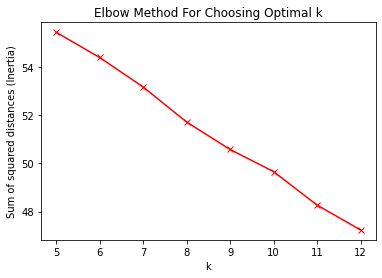

In [15]:
#attempt to use elbow method to find optimal k for kmeans
#doesn't really give great "elbowy" results

#inertia = sum of squared distances of data points to closest centroid
sum_of_squared_distances = []
K = range(5,13)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(vectors)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'rx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Choosing Optimal k')
plt.show()

In [16]:
#create a df with clusters for each subject where k is in the range 5-12
kmeans_df = subject_df.copy()

K = range(5,13)
for k in K:
    model = KMeans(n_clusters=k, init="k-means++")
    model.fit(vectors)
    labels = model.labels_
    kmeans_df["Cluster when k = " + str(k)] = labels

kmeans_df.head()

Abbreviation                                Subject  \
0          ACC                             Accounting   
1          ADC  African American and Diaspora Studies   
2          ANT                           Anthropology   
3          ARB                                 Arabic   
4          ART                                    Art   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [17]:
#save the kmeans df to disk as a pickle file
path = r"C:\Users\Mandy\Documents\Data science projects\Furman catalog\kmeans_results.pkl"
kmeans_df.to_pickle(path)

In [18]:
#also save as a csv file in case i want to scroll through it, but omit description column bc it's too long
kmeans_df_no_desc = kmeans_df.copy()
kmeans_df_no_desc.drop(columns = ["Description"], inplace=True)
path = r"C:\Users\Mandy\Documents\Data science projects\Furman catalog\kmeans_results.csv"
kmeans_df_no_desc.to_csv(path)

In [31]:
#show one example value for k
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++')
model.fit(vectors)
labels = model.labels_
subject_clusters = pd.DataFrame(list(zip(subject_df['Abbreviation'], subject_df['Subject'], labels)),columns=['abbrv','subject','cluster'])
print(subject_clusters.sort_values(by=['cluster']))

   abbrv                                  subject  cluster
22  EDFD                  Educational Foundations        0
19  EDEC                Early Childhood Education        0
18  EDCI  Curriculum and Instruction in Education        0
45   LNG                              Linguistics        0
23  EDMT               Master of Arts in Teaching        0
..   ...                                      ...      ...
16   DSC                             Data Science        4
53   NSC                             Neuroscience        4
36   GRK                                    Greek        5
12   CLS                                 Classics        5
46   LTN                                    Latin        5

[69 rows x 3 columns]


Cluster: 0
Subjects
18            EDCI: Curriculum and Instruction in Education
19                          EDEC: Early Childhood Education
20                      EDEP: Extended Program in Education
21                      EDEX: Exceptionalities in Education
22                            EDFD: Educational Foundations
23                         EDMT: Master of Arts in Teaching
24    EDOL: Teaching English to Speakers of Other Languages
25                                 EDRD: Literacy Education
26                  EDSL: School and Educational Leadership
28                                           EDU: Education
45                                         LNG: Linguistics
48                    MLL: Modern Languages and Literatures
dtype: object


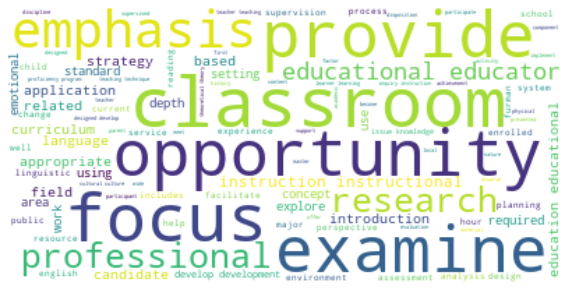

Cluster: 1
Subjects
0                             ACC: Accounting
2                           ANT: Anthropology
5                           AS: Asian Studies
6                          AST: Asian Studies
7                                BIO: Biology
8                BUS: Business Administration
9             CEM: Community Engaged Medicine
13                 COM: Communication Studies
17                             ECN: Economics
27          EDSP: Special Topics in Education
31                 EST: Environmental Studies
35                             GGY: Geography
38                       HSC: Health Sciences
39                               HST: History
44                LAS: Latin American Studies
47       MES: Middle East and Islamic Studies
49           MSL: Military Science Leadership
52                        MXP: May Experience
55                               PHY: Physics
56    POL: Politics and International Affairs
58                       PVS: Poverty Studies
60            

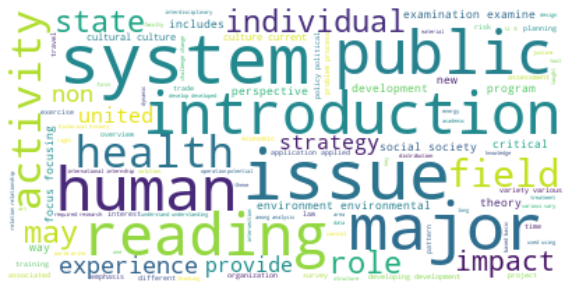

Cluster: 2
Subjects
4                                        ART: Art
15                                     DAN: Dance
30                                   ENG: English
32                                    FRN: French
33                              FST: Film Studies
34                        FYW: First Year Writing
37                                    GRM: German
40                                HUM: Humanities
41                 IDS: Interdisciplinary Studies
50                               MTH: Mathematics
51                                     MUS: Music
54                                PHL: Philosophy
57                                PSY: Psychology
59                                  REL: Religion
61                          SDG: Strategic Design
63                                   SPN: Spanish
64                               STAT: Statistics
66             TFA: Summer Undergraduate Research
67                              THA: Theatre Arts
68    WGS: Women's, Gender, an

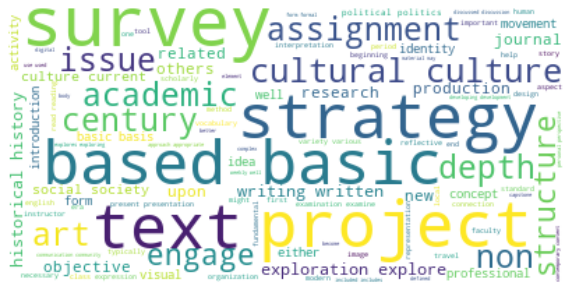

Cluster: 3
Subjects
3       ARB: Arabic
11     CHN: Chinese
42     ITL: Italian
43    JPN: Japanese
dtype: object


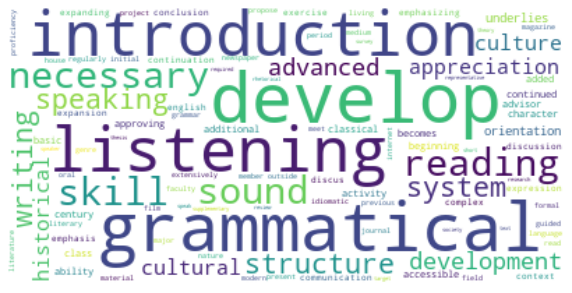

Cluster: 4
Subjects
1     ADC: African American and Diaspora Studies
10                                CHM: Chemistry
14                         CSC: Computer Science
16                             DSC: Data Science
29         EES: Earth and Environmental Sciences
53                             NSC: Neuroscience
dtype: object


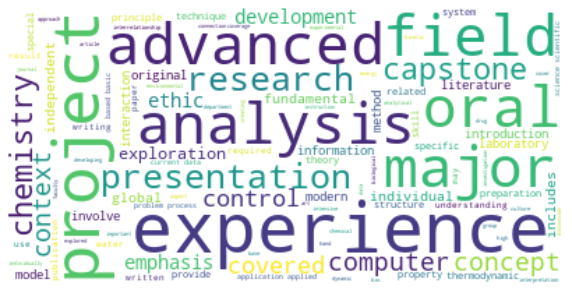

Cluster: 5
Subjects
12    CLS: Classics
36       GRK: Greek
46       LTN: Latin
dtype: object


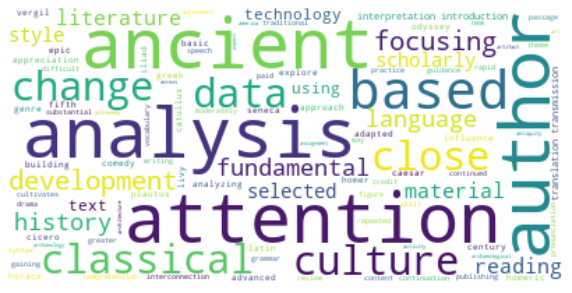

In [32]:
#create wordclouds of results for example
#use the distinct df so words aren't repeated
result = pd.DataFrame({'cluster':labels,'subject':subject_df_distinct['Description']})

for k in range(0,true_k):
    s = result[result.cluster == k]
    text = s['subject']
    text = s['subject'].str.cat(sep=' ')
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Subjects')
    sub = subject_clusters[subject_clusters.cluster==k]
    print(sub['abbrv'] + ": " + sub['subject'])
    plt.rcParams["figure.figsize"] = (10,10)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()